# Dataset de Novel de Obesidad

El dataset **“Estimation of Obesity Levels Based on Eating Habits and Physical Condition”** reúne información de 2.111 individuos de México, Perú y Colombia. El objetivo es predecir el **nivel de obesidad** de cada persona a partir de hábitos alimenticios, características físicas y estilo de vida.

El conjunto contiene **17 atributos** (16 predictivos y 1 variable objetivo) que abarcan aspectos relacionados con la edad, el peso, la estatura, los antecedentes familiares, el consumo de ciertos alimentos y bebidas, el uso de tecnología, la actividad física y los medios de transporte. El nivel de obesidad está clasificado en siete
categorías, que van desde “peso insuficiente” hasta “obesidad tipo III”.

|          **Atributo**          |                                                                  **Descripción**                                                                   |
|:------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------:|
|             Gender             |                                                         Género del individuo (Male/Female)                                                         |
|              Age               |                                                                    Edad en años                                                                    |
|             Height             |                                                                  Altura en metros                                                                  |
|             Weight             |                                                                 Peso en kilogramos                                                                 |
| family_history_with_overweight |                                                   Si tiene antecedentes familiares de sobrepeso                                                    |
|              FAVC              |                                           Frecuencia de consumo de alimentos con alto contenido calórico                                           |
|              FCVC              |                                                     Frecuencia de consumo de vegetales (1 a 3)                                                     |
|              NCP               |                                                        Número de comidas principales al día                                                        |
|              CAEC              |                                       Consumo de alimentos entre comidas (no, Sometimes, Frequently, Always)                                       |
|             SMOKE              |                                                                    Si fuma o no                                                                    |
|              CH2O              |                                                          Consumo de agua diario en litros                                                          |
|              SCC               |                                                         Si controla el consumo de calorías                                                         |
|              FAF               |                                                   Frecuencia de actividad física (horas/semana)                                                    |
|              TUE               |                                               Tiempo de uso de dispositivos electrónicos (horas/día)                                               |
|              CALC              |                                                Consumo de alcohol (no,Sometimes,Frequently,Always)                                                 |
|             MTRANS             |                              Medio de transporte principal (Automobile,Bike,Motorbike,Public_Transportation,Walking)                               |
|       NObesity (Target)        | Nivel de obesidad (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) |


In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'  # carpeta donde se encuentran los datasets
else:
    DATOS_DIR   = '../Data_Sets/p1/' # carpeta LOCAL donde se encuentran los datasets


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(DATOS_DIR + 'obesity_uci.csv')

## Ejercicio 1

Complete la tabla indicando cuántos atributos corresponden a cada del dataset de obesidad.

| **Tipo de atributo** | **Cantidad** |            **Cuales**            |
|:---------------------|:-------------|:--------------------------------:|
| Discreto (numérico)  | 3            |           AGE,NCP,FCVC           |
| Continuo (numérico)  | 6            | HEIGHT,WEIGHT,FAVC,CH2O,FAF,TUE, |
| Nominal (categórico) | 4            |      GENDER,FHWO,SMOKE,SCC       |
| Ordinal (categórico) | 4            |    CAEC,CALC,MTRANS,NOBESITY     |


## Ejercicio 2

Proponga una tarea de clasificación y una tarea de regresión que puedan realizarse a partir de los datos del
dataset de obesidad.

Gender
Male      332
Female    248
Name: count, dtype: int64


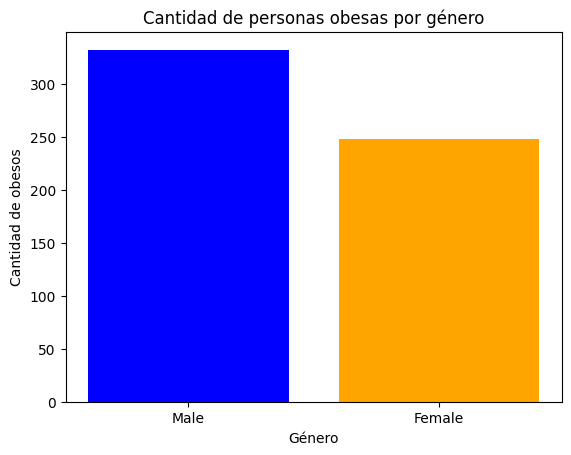

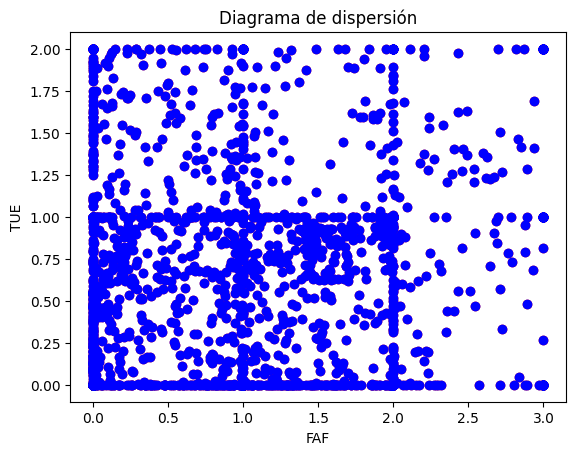

In [2]:

# Filtramos solo las filas donde la persona es obesa
obesos = data[data['NObesity'].isin(['Overweight_Level_I', 'Overweight_Level_II'])]


# Contamos por género
barras = obesos['Gender'].value_counts()
print(barras)

# Gráfico de barras
plt.figure()
plt.bar(barras.index, barras.values, color=['blue', 'orange'])
plt.xlabel('Género')
plt.ylabel('Cantidad de obesos')
plt.title('Cantidad de personas obesas por género')
plt.show()

# Regresión FAF y TUE

plt.figure()
plt.plot(data.FAF, data.TUE, 'or')
plt.plot(data.FAF, data.TUE, 'ob')
plt.xlabel('FAF')
plt.ylabel('TUE')
plt.title('Diagrama de dispersión')
plt.show()

## Ejercicio 3

Indique qué tipo de información brindan las siguientes representaciones gráficas:

**a)** Diagrama de Barras

**b)** Histograma

**c)** Diagrama de caja

**d)** Diagrama de dispersión

Luego, genere al menos un ejemplo de cada representación usando el dataset de obesidad y explique
cómo interpretar cada uno.

### a) Diagrama de Barras

> **Explicación:** El diagrama de barras se utiliza **para representar datos de variables cualitativas o cuantitativas discretas**. Cada categoría se representa mediante una barra cuya altura es proporcional a la frecuencia absoluta o relativa de dicha categoría. Las barras suelen estar separadas entre sí, ya que cada una representa una categoría distinta e independiente.

NObesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


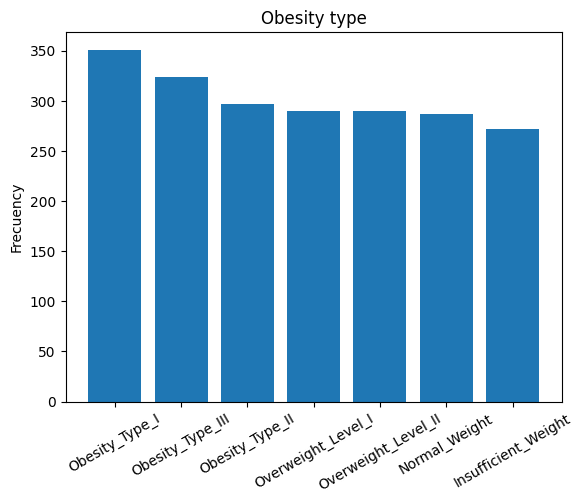

In [3]:
barras = data['NObesity'].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title('Obesity type')      # Colocamos el título
plt.ylabel('Frecuency')
# Colocamos las etiquetas del eje x con rotación para evitar superposición
plt.xticks(np.arange( N ), barras.index, rotation=30)
plt.show()

### b) Histograma

> **Explicación:** Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza para visualizar la frecuencia de ocurrencia de diferentes **intervalos o categorías en un conjunto de datos continuo**.

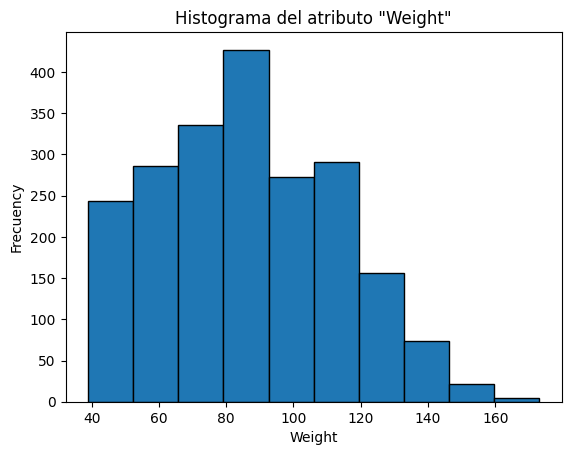

In [4]:
plt.figure()
plt.hist(data['Weight'], bins = 10, edgecolor = 'black', \
         linewidth=1)
plt.xlabel('Weight')
plt.ylabel('Frecuency')
plt.title('Histograma del atributo "Weight"')
plt.show()


### c) Diagrama de caja

> **Explicación:** Es una representación gráfica de una muestra para mostrar sus características principales y señalar los posibles datos atípicos.

<Axes: >

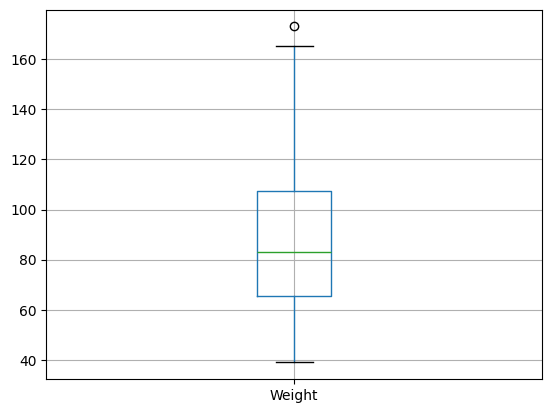

In [11]:
data.boxplot(column=['Weight'], vert=True)

### d) Diagrama de dispersión

> **Explicación:** Dadas dos variables (Y, X) tomadas sobre el mismo elemento de la población, el diagrama de dispersión es simplemente un gráfico de dos dimensiones, donde en un eje (la abscisa) se sitúa la variable independiente, y en el otro eje (la ordenada) se sitúa la variable dependiente. Si las variables están correlacionadas, el gráfico mostraría algún nivel de correlación (tendencia) entre las dos variables. Si no hay ninguna correlación, el gráfico presentaría una figura sin forma, una nube de puntos dispersos en el gráfico.

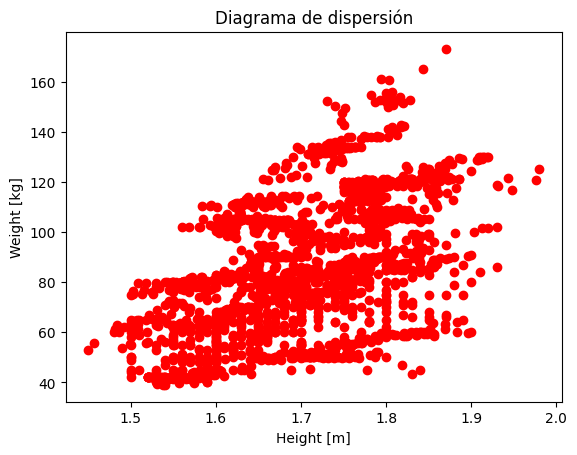

In [10]:
plt.figure()
plt.plot(data.Height, data.Weight, 'or')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.title('Diagrama de dispersión')
plt.show()

## Ejercicio 4

Complete el siguiente cuadro y dibuje el diagrama de caja del atributo **“weight”**

|               **Medida**                |                        **Valor**                         |
|:---------------------------------------:|:--------------------------------------------------------:|
|                 Mínimo                  |                           39.0                           |
|                 Máximo                  |                          173.0                           |
|                   Q1                    |                        65.473343                         |
|              Q2 o mediana               |                           83.0                           |
|                   Q3                    |                        107.430682                        |
|                   RIC                   |                    41.957339000000005                    |
|             Bigote superior             |                       170.3666905                        |
|             Bigote inferior             |                    2.537334499999993                     |
|  Intervalos de valores atípicos leves   |         [ -60.39 ; 2.53 ) ó ( 170.36 ; 233.30 ]          |
|         Valores atípicos leves          |                           173                            |
| Intervalos de valores atípicos extremos | [ -∞; -60.398674000000014 ) ó ( 233.30269900000002 ; +∞] |
|        Valores atípicos extremos        |                          No hay                          |


In [19]:
Minimo = data['Weight'].min()
Maximo = data['Weight'].max()
print('Mínimo: ', Minimo)
print('Máximo: ', Maximo)
Q = data['Weight'].quantile([0.25, 0.5, 0.75])
print('Q1:', Q[0.25], '\nQ2:', Q[0.5], '\nQ3:', Q[0.75])
RIC = Q[0.75] - Q[0.25]
print('RIC: ', RIC)
Bigote_superior = Q[0.75] + 1.5 * RIC
Bigote_inferior = Q[0.25] - 1.5 * RIC
print('Bigote superior: ', Bigote_superior)
print('Bigote inferior: ', Bigote_inferior)
mild_outliers = data[(data["Weight"] < (Q.min() - 1.5 * RIC)) | (data["Weight"] > (Q.max() + 1.5 * RIC))]
print("Intervalos de valores atípicos leves: [", Q.min() - 3 * RIC, "; ", Q.min() - 1.5 * RIC, ") ó (", Q.max() + 1.5 * RIC, "; ", Q.max() + 3 * RIC, "]", "\n")
print("Valores atípicos leves:\n", mild_outliers.Weight.values, "\n") 

print("Intervalos de valores atípicos extremos: [ -∞;", Q.min() - 3 * RIC,  ") ó ( ", Q.max() + 3 * RIC, "; +∞]", "\n")
extreme_outliers = data[(data["Weight"] < (Q.min() - 3 * RIC)) | (data["Weight"] > (Q.max() + 3 * RIC))]
print("Valores atípicos extremos:\n", extreme_outliers.Weight.values, "\n")



Mínimo:  39.0
Máximo:  173.0
Q1: 65.473343 
Q2: 83.0 
Q3: 107.430682
RIC:  41.957339000000005
Bigote superior:  170.3666905
Bigote inferior:  2.537334499999993
Intervalos de valores atípicos leves: [ -60.398674000000014 ;  2.537334499999993 ) ó ( 170.3666905 ;  233.30269900000002 ] 

Valores atípicos leves:
 [173.] 

Intervalos de valores atípicos extremos: [ -∞; -60.398674000000014 ) ó (  233.30269900000002 ; +∞] 

Valores atípicos extremos:
 [] 



## Ejercicio 5

Los valores del atributo peso (**“weight”**) fueron agrupados según el atributo de antecedente de obesidad familiar (**“family_history_with_overweight”**). La figura muestra los diagramas de caja correspondientes.

<div style="text-align: center;">
    <img src='../../images/p1-ej5.png' width="70%">
</div>

Complete el siguiente cuadro y responda verdadero o falso justificando cada afirmación según los valores obtenidos:

|   **Medida**    |   **yes**    |   **no**   |
|:---------------:|:------------:|:----------:|
|     Máximo      |    173.0     |   115.0    |
|       Q1        |  75.851219   | 49.039794  |
|     Mínimo      |     39.0     | 39.101805  |
|       Q2        |  89.9866755  |     56     |
|       Q3        | 111.8390105  |    69.5    |
|       RIC       |  35.9877915  | 20.460206  |
| Bigote Inferior | 21.86953175  | 18.349485  |
| Bigote Superior | 165.82069775 | 100.190309 |

**a)** Al menos el 25% de las personas con antecedentes familiares de obesidad pesan más de 100 kg.
	
 - **RTA: Verdadero**. Por ser Q3 mayor a 100 kg, nos indica que el 25% de las personas con antecendentes tienen más 111.8390105 kg, por lo tanto, existirá al menos una cuarta parte con más de 100kg.

**b)** Es atípico que una persona sin antecedentes familiares de obesidad (no) pese más de 115 kg.

 - **RTA: Verdadero**. 115kg supera el bigote superior que es de 100.190309.

**c)** La mediana del peso de las personas sin antecedentes familiares (no) es menor que 60 kg.

 - **RTA: Verdadero**. Q2 < 60 kg.

**d)** Todos los valores atípicos para personas con antecedentes familiares de obesidad son leves.

  - **RTA: Verdadero**. No hay una persona que pese más de Q3 + 3*RIC =  111.8390105 + 3*35.9877915 = 219.802385

In [8]:
data_without_family_history = data[data.family_history_with_overweight == 'no']
data_with_family_history = data[data.family_history_with_overweight == 'yes']
print("Mínimo sin antecedentes familiares = ", data_without_family_history["Weight"].min(), "\n")
print("Mínimo con antecedentes familiares = ", data_with_family_history["Weight"].min(), "\n")
print("Máximo sin antecedentes familiares = ", data_without_family_history["Weight"].max(), "\n")
print("Máximo con antecedentes familiares = ", data_with_family_history["Weight"].max(), "\n")
Q_without_family_history = data_without_family_history["Weight"].quantile([0.25, 0.5, 0.75]).values
Q_with_family_history = data_with_family_history["Weight"].quantile([0.25, 0.5, 0.75]).values
print("CUARTILES sin antecedentes familiares = ", Q_without_family_history, "\n")
print("CUARTILES con antecedentes familiares = ", Q_with_family_history, "\n")
RIC_without_family_history = Q_without_family_history[2] - Q_without_family_history[0]
RIC_with_family_history = Q_with_family_history[2] - Q_with_family_history[0]
print("RIC sin antecedentes familiares = ", RIC_without_family_history, "\n")
print("RIC con antecedentes familiares = ", RIC_with_family_history, "\n")
print("Bigote superior (LS) sin antecedentes familiares = ", Q_without_family_history.max() + 1.5 * RIC_without_family_history, "\n")
print("Bigote inferior (LI) sin antecedentes familiares = ", Q_without_family_history.min() - 1.5 * RIC_without_family_history, "\n")
print("Bigote superior (LS) con antecedentes familiares = ", Q_with_family_history.max() + 1.5 * RIC_with_family_history, "\n")
print("Bigote inferior (LI) con antecedentes familiares = ", Q_with_family_history.min() - 1.5 * RIC_with_family_history, "\n")

Mínimo sin antecedentes familiares =  39.101805 

Mínimo con antecedentes familiares =  39.0 

Máximo sin antecedentes familiares =  115.0 

Máximo con antecedentes familiares =  173.0 

CUARTILES sin antecedentes familiares =  [49.039794 56.       69.5     ] 

CUARTILES con antecedentes familiares =  [ 75.851219   89.9866755 111.8390105] 

RIC sin antecedentes familiares =  20.460206 

RIC con antecedentes familiares =  35.9877915 

Bigote superior (LS) sin antecedentes familiares =  100.190309 

Bigote inferior (LI) sin antecedentes familiares =  18.349485 

Bigote superior (LS) con antecedentes familiares =  165.82069775 

Bigote inferior (LI) con antecedentes familiares =  21.86953175 



## Ejercicio 6

Discretice el atributo del consumo de agua diario en litros (**“CH2O”**) en tres intervalos: **Bajo, Medio y Alto**. Indique en la tabla los intervalos utilizados y la cantidad respectivas de ejemplos de cada uno al discretizar por rango y por intervalo. Luego, explique porque los ejemplos no quedaron divididos en intervalos con la misma cantidad de valores.

<table border="1" cellspacing="0" cellpadding="5" style="margin: auto; border: 1px solid black;">
    <thead>
        <tr>
            <th rowspan="2"></th>
            <th colspan="3">Rango</th>
            <th colspan="3">Intervalo</th>
        </tr>
        <tr>
            <th>Bajo</th>
            <th>Medio</th>
            <th>Alto</th>
            <th>Bajo</th>
            <th>Medio</th>
            <th>Alto</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Intervalos</td>
            <td>(0.998, 1.667]</td>
            <td>(1.667, 2.333]</td>
            <td>(2.333, 3.0]</td>
            <td>(0.999, 1.92]</td>
            <td>(1.92, 2.185]</td>
            <td>(2.185, 3.0]</td>
        </tr>
        <tr>
            <td>Cantidad de Valores</td>
            <td>576</td>
            <td>910</td>
            <td>625</td>
            <td>704</td>
            <td>703</td>
            <td>704</td>
        </tr>
    </tbody>
</table>


In [22]:
etiq = ['Bajo','Medio', 'Alto']
# Discretización por RANGO
columna = pd.cut(data["CH2O"],bins=len(etiq),labels=etiq)
data['CH20_rango']= pd.Series.to_frame(columna) # añadimos la nueva columna al DataFrame
print(pd.value_counts(data['CH20_rango']))
print("intervalos = ", pd.cut(data["CH2O"], bins=len(etiq)).unique())

#Discretización por CUARTILES
columna_q = pd.qcut(data["CH2O"], q=3, labels=etiq)
data['CH20_cuantil'] = columna_q
print(data['CH20_cuantil'].value_counts())
print("intervalos = ", pd.qcut(data["CH2O"], q=3).unique())


CH20_rango
Medio    910
Alto     625
Bajo     576
Name: count, dtype: int64
intervalos =  [(1.667, 2.333], (2.333, 3.0], (0.998, 1.667]]
Categories (3, interval[float64, right]): [(0.998, 1.667] < (1.667, 2.333] < (2.333, 3.0]]
CH20_cuantil
Bajo     704
Alto     704
Medio    703
Name: count, dtype: int64
intervalos =  [(1.92, 2.185], (2.185, 3.0], (0.999, 1.92]]
Categories (3, interval[float64, right]): [(0.999, 1.92] < (1.92, 2.185] < (2.185, 3.0]]


/tmp/ipykernel_18536/3720117998.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(data['CH20_rango']))
